# CBOW : Continuous Bag-of-Words

## Prepare the Data

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Corpus
def read_sentences_from_file(file_path):
    corpus = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line contains one sentence
            sentence = line.strip()
            if sentence:  # Check if the line is not empty
                corpus.append(sentence)
    return corpus
corpus = read_sentences_from_file("corpus.txt")

corpus

['Alice eats cake.',
 'Bob runs fast.',
 'Alice jumps high.',
 'Bob smiles wide.',
 'Alice dances well.',
 'Bob sleeps deeply.',
 'Alice sings sweetly.',
 'Bob laughs loudly.',
 'Alice reads books.',
 'Bob drinks water.',
 'Alice draws flowers.',
 'Bob plays ball.',
 'Alice hugs trees.',
 'Bob climbs trees.',
 'Alice sees birds.',
 'Bob hears music.',
 'Alice smells roses.',
 'Bob tastes pizza.',
 'Alice touches clouds.',
 'Bob builds sandcastles.',
 'Alice swims gracefully.',
 'Bob cycles quickly.',
 'Alice paints pictures.',
 'Bob cooks eggs.',
 'Alice bakes cookies.',
 'Bob watches movies.',
 'Alice skips rocks.',
 'Bob catches fish.',
 'Alice explores caves.',
 'Bob sails boats.',
 'Alice plants seeds.',
 'Bob rides bikes.',
 'Alice feeds birds.',
 'Bob chases butterflies.',
 'Alice catches fireflies.',
 'Bob splashes water.',
 'Alice climbs mountains.',
 'Bob explores forests.',
 'Alice picnics outside.',
 'Bob camps overnight.',
 'Alice paddles canoes.',
 'Bob hikes trails.',
 'A

In [67]:
# Tokenize and create vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(word_index)
print(vocab_size)

{'alice': 1, 'bob': 2, 'and': 3, 'water': 4, 'high': 5, 'trees': 6, 'birds': 7, 'with': 8, 'cake': 9, 'fast': 10, 'jumps': 11, 'wide': 12, 'deeply': 13, 'sings': 14, 'sweetly': 15, 'loudly': 16, 'flowers': 17, 'plays': 18, 'ball': 19, 'climbs': 20, 'music': 21, 'pizza': 22, 'clouds': 23, 'builds': 24, 'gracefully': 25, 'quickly': 26, 'pictures': 27, 'cookies': 28, 'rocks': 29, 'catches': 30, 'fish': 31, 'explores': 32, 'caves': 33, 'boats': 34, 'seeds': 35, 'bikes': 36, 'outside': 37, 'overnight': 38, 'canoes': 39, 'trails': 40, 'sunsets': 41, 'cars': 42, 'down': 43, 'robots': 44, 'songs': 45, 'big': 46, 'sing': 47, 'play': 48, 'climb': 49, 'build': 50, 'catch': 51, 'explore': 52, 'bugs': 53, 'eats': 54, 'runs': 55, 'smiles': 56, 'dances': 57, 'well': 58, 'sleeps': 59, 'laughs': 60, 'reads': 61, 'books': 62, 'drinks': 63, 'draws': 64, 'hugs': 65, 'sees': 66, 'hears': 67, 'smells': 68, 'roses': 69, 'tastes': 70, 'touches': 71, 'sandcastles': 72, 'swims': 73, 'cycles': 74, 'paints': 75, 

##  Input-Output Pairs

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
context_window = 2

def generate_data(corpus, context_window, tokenizer, test_size):
    sequences = tokenizer.texts_to_sequences(corpus)
    X, y = [], []
    for sequence in sequences:
        for i in range(context_window, len(sequence) - context_window):
            context = sequence[i - context_window : i] + sequence[i + 1 : i + context_window + 1]
            target = sequence[i]
            X.append(context)
            y.append(target)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
   
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [69]:
X_train, X_test, y_train, y_test = generate_data(corpus, context_window, tokenizer, test_size=0.1)

## Create CBOW Model Architecture

In [70]:
embedding_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

## Train the CBOW Model

In [71]:
epochs = 50
batch_size = 16

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50


3/3 [==============================] - 1s 8ms/step - loss: 4.9947
Epoch 2/50
3/3 [==============================] - 0s 10ms/step - loss: 4.9693
Epoch 3/50
3/3 [==============================] - 0s 503us/step - loss: 4.9435
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 4.9171
Epoch 5/50
3/3 [==============================] - 0s 0s/step - loss: 4.8893
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 4.8601
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 4.8286
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 4.7950
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 4.7586
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 4.7192
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 4.6768
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 4.6304
Epoch 13/50
3/3 [==============================] - 0s 1ms/step - loss: 4.5808
Epoc

## Evaluate the CBOW Model

In [72]:
# # Perform evaluation on test data if available
# test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
# # print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

evaluation_result = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nEvaluation result:", evaluation_result)

1/1 [==============================] - 0s 221ms/step - loss: 1.6664

Evaluation result: 1.6663916110992432


In [73]:
# Assume you have the trained CBOW model stored in the variable `cbow_model`

def predict_word_cbow(context_words, cbow_model, tokenizer):
    # Convert context words to sequence
    context_sequence = tokenizer.texts_to_sequences([context_words])
    # Pad sequence if necessary
    padded_sequence = pad_sequences(context_sequence, maxlen=context_window * 2, padding='post')
    # Predict the target word
    prediction = cbow_model.predict(padded_sequence)
    # Get the index of the predicted word
    predicted_index = np.argmax(prediction)
    # Convert the index back to word
    predicted_word = tokenizer.index_word[predicted_index]
    return predicted_word

# Example test
context_words = ["Alice", "cake"]  # Example context words
predicted_word = predict_word_cbow(context_words, model, tokenizer)
print("Predicted word for context words 'Alice cake':", predicted_word)

1/1 [==============================] - 0s 100ms/step
Predicted word for context words 'Alice cake': bob


## Visualizing Word Embeddings using t-SNE:

## 2D

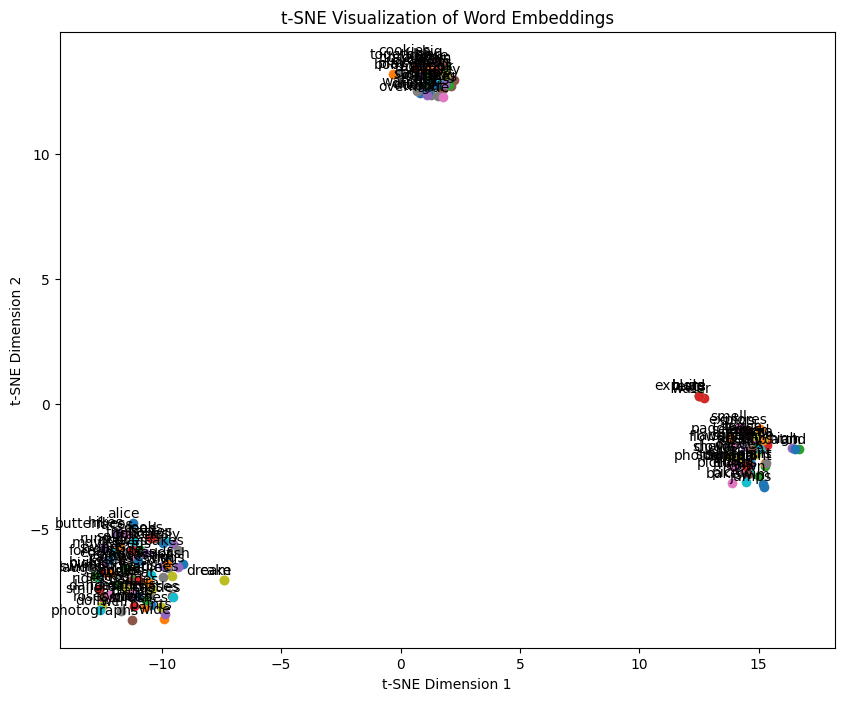

In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract word embeddings
embeddings = model.layers[0].get_weights()[0]

# Visualize word embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
for i, word in enumerate(word_index.keys()):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


## 3D

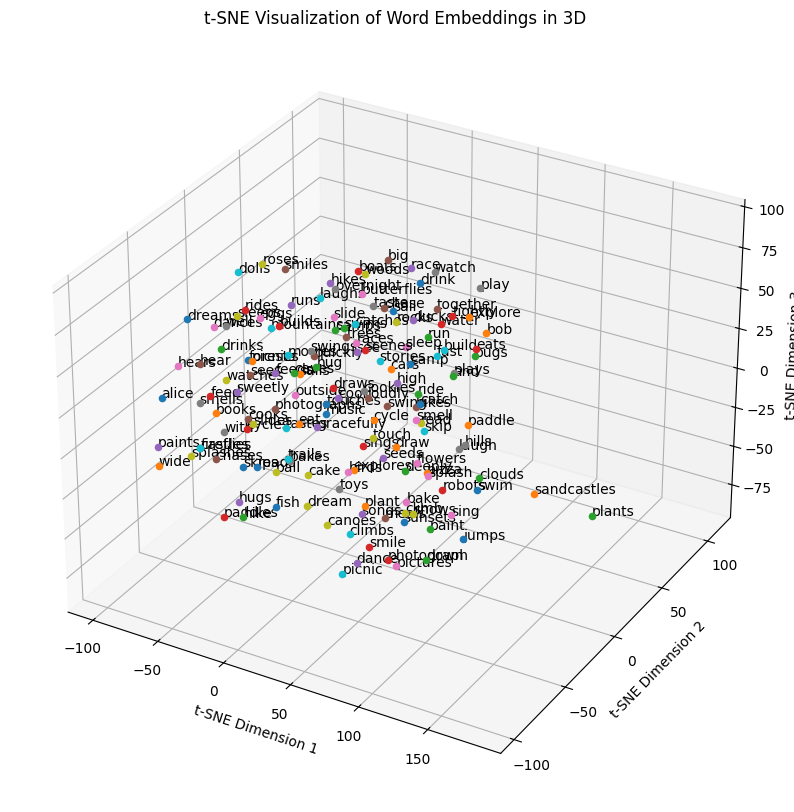

In [75]:
# Visualize word embeddings using t-SNE in 3D
tsne_3d = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne_3d.fit_transform(embeddings)

# Plot t-SNE visualization in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i, word in enumerate(word_index.keys()):
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2])
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], word)
ax.set_title('t-SNE Visualization of Word Embeddings in 3D')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

It performs well when the task involves frequent words and overall context